In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cmath as cm
from sympy import *
from scipy.misc import derivative
from scipy.interpolate import lagrange
import scipy.special as sc

# Modelo de ising 2D

Np = Numero de pares de primeros vecinos ${\langle i, j \rangle}$

In [ ]:
def Np(N):
  return 2*N*(N-1)

## Matriz de conexion

Supongamos un arreglo 4x4 


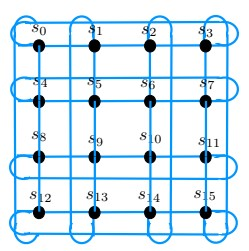

Queremos hacer una matriz de $N^2$X$N^2$ en el que se observe la interaccion de cada espin con sus primeros vecinos teniendo en cuenta las condiciones de frontera periodicas. Por lo tanto, cada spin interacciona con 4 spines vecinos. Para el modelo 4X4 la matriz es de la forma:

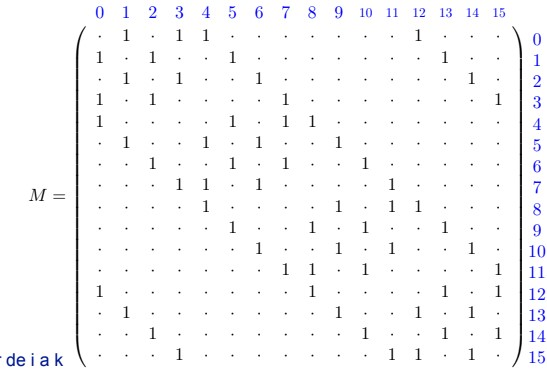

Donde la traza de esta matriz elevada a la $l$ cuenta el numero de rutas cerradas de $l$ pasos

$$
  h(l) = Tr (M^l)=\text{# de rutas cerradas de l pasos}
$$

Definimos una funcion para definir la matriz de conexión Para cualquier N

In [ ]:
def M(N):
  LAMBDA = np.zeros((N,N))
  spin = 0
  for i in range(0,N):
    for j in range(0,N):
      LAMBDA[i][j] = spin
      spin +=1

  M = np.zeros((N**2,N**2))
  for i in range(0,N):
    for j in range(0,N):    
      n1 = i + 1
      m1 = j + 1
      if n1 >= N:
        n1 = 0
      if m1 >= N:
        m1 = 0
      n2 = i-1
      m2 = j-1
      if n2< 0:
        n2 = -1
      if m2<0:
        m2 = -1
      M[int(LAMBDA[i][j])][int(LAMBDA[i][m1])] = 1
      M[int(LAMBDA[i][j])][int(LAMBDA[i][m2])] = 2
      M[int(LAMBDA[i][j])][int(LAMBDA[n1][j])] = 3
      M[int(LAMBDA[i][j])][int(LAMBDA[n2][j])] = 4
  return M

Definimos las matrices de giros:

  $
m1 = m(-1,0)=\left(\begin{array}{cccc}
e^{i \pi / 2} & 0 & 0 & 0 \\
e^{-i \pi / 4} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
e^{i \pi / 4} & 0 & 0 & 0
\end{array}\right)
$; $m2=
m(1,0)=\left(\begin{array}{cccc}
0 & 0 & 0 & 0 \\
0 & 0 & e^{i \pi / 4} & 0 \\
0 & 0 & e^{i \pi / 2} & 0 \\
0 & 0 & e^{-i \pi / 4} & 0
\end{array}\right)
$;


$m3=
m(0,-1)=\left(\begin{array}{cccc}
0 & e^{i \pi / 4} & 0 & 0 \\
0 & e^{i \pi / 2} & 0 & 0 \\
0 & e^{-i \pi / 4} & 0 & 0 \\
0 & 0 & 0 & 0
\end{array}\right)
$; $m4=
m(0,1)=\left(\begin{array}{cccc}
0 & 0 & 0 & e^{-i \pi / 4} \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & e^{i \pi / 4} \\
0 & 0 & 0 & e^{i \pi / 2}
\end{array}\right)
$

In [ ]:
m1 = [[np.exp(1j*np.pi/2),0,0,0],[np.exp(-1j*np.pi/4),0,0,0],[0,0,0,0],[np.exp(1j*np.pi/4),0,0,0]]
m2 = [[0,0,0,0],[0,0,np.exp(1j*np.pi/4),0],[0,0,np.exp(1j*np.pi/2),0],[0,0,np.exp(-1j*np.pi/4),0]]
m3 = [[0,np.exp(1j*np.pi/4),0,0],[0,np.exp(1j*np.pi/2),0,0],[0,np.exp(-1j*np.pi/4),0,0],[0,0,0,0]]
m4 = [[0,0,0,np.exp(-1j*np.pi/4)],[0,0,0,0],[0,0,0,np.exp(1j*np.pi/4)],[0,0,0,np.exp(1j*np.pi/2)]]

Construimos una función que construya una matriz $4N^2$X$4N^2$ donde se remplazan las matrices de giro

In [ ]:
def M_giro(Mf,N):
  M_new = np.ones((4*N**2,4*N**2),dtype=np.complex128)
  aux_f = 0
  for fila in Mf:
    aux_c = 0
    for elemento in fila:
      for i in range(0,4):
        fil_in = aux_f*4
        for j in range(0,4):
          col_in = aux_c*4
          if elemento == 0:
            M_new[fil_in+i][col_in+j] = 0
          elif elemento ==1:
            M_new[fil_in+i][col_in+j] = m1[i][j]
          elif elemento ==2:
            M_new[fil_in+i][col_in+j] = m2[i][j]
          elif elemento ==3:
            M_new[fil_in+i][col_in+j] = m3[i][j]
          elif elemento ==4:
            M_new[fil_in+i][col_in+j] = m4[i][j]
      aux_c += 1
    aux_f +=1
  return M_new    

Construimos una funcion para diagonalizar la matriz y finalmente retorne los valores propios de la matriz grande

In [ ]:
def propios(Mat):
  Mat = Matrix(Mat)
  print("Diagonalizando matriz ...")
  P, Md = Mat.diagonalize()
  print("Matriz M diagonalizada")
  Valores_propios = Md.eigenvals()
  propios = []
  multi = []
  for valor in Valores_propios:
    propios.append(valor)
    multi.append(Valores_propios[valor])
  return [propios, multi]

La funcion particion se puede calcular de la forma:

$$
\mathcal{Z}_{\text {Ising }} =[\cosh (\beta J)]^{N p} 2^{N} \exp \left[\sum_{l=1}^{\infty} D(l) \nu^{l}\right]
$$

Donde 

$$
D(l)=-\frac{1}{2 l} \sum_{i} \operatorname{Tr} m_{i i}^{l}=-\frac{1}{2 l} \sum_{\alpha=1}^{4 N} \lambda_{\alpha}^{l}
$$


In [ ]:
def D(l,lam,Np):
  sum = 0
  tamaño = len(lam[0])
  for i in range(tamaño):
    val = complex(lam[0][i])
    mul = lam[1][i]
    sum += pow(val,l)*mul
    return -(1/(2*l))*sum

def Z(K,Np, N, lam):
  sum = 0
  tamaño = len(lam[0])
  for i in range(1,Np+1):
    sum += D(i,lam,np)*pow(np.tanh(K),i)
  return (2**N)*(pow(np.cosh(K),Np))*(np.exp(sum))

O escrita de otra forma:

$$
\mathcal{Z}_{\text {Ising }}=[\cosh (\beta J)]^{N p} 2^{N} \exp \left[\frac{1}{2} \sum_{\alpha=1}^{4 N^2} \ln \left(1-\lambda_{\alpha} \nu\right)\right]
$$

Donde $\lambda$ son los valores propios de la matriz calculada anteriormente. Esta función es:

In [ ]:
def Particion(K,Np, N, lam):
  sum = 0
  tamaño = len(lam[0])
  for i in range(tamaño):
    val = complex(lam[0][i])
    mul = lam[1][i]
    sum += np.log(1-val*(np.tanh(K)))*mul
  return (2**N)*(pow(np.cosh(K),Np))*(np.exp(0.5*sum))

Donde los parametros son $\beta$, $J$, $N_p$, N y $\lambda_{\alpha}$ 

Sabemos que la energia promedio se calcula mediante

$$
  \langle E \rangle_{T} = -\frac{1}{\mathcal{Z}}\frac{\partial \mathcal{Z}}{\partial \beta} = - \frac{\partial Ln (\mathcal{Z})}{\partial \beta} =-\frac{\partial K}{\partial \beta}\frac{\partial Ln (\mathcal{Z})}{\partial K} 
$$

con K = $\beta J$

In [ ]:
def dE(K,Np, N, lam):
  sum1 = 0
  sum2 = 0
  tamaño = len(lam[0])
  for i in range(tamaño):
    val = complex(lam[0][i])
    mul = lam[1][i] 
    sum1 += np.log(1-val*(np.tanh(K)))*mul
    sum2 += (val*pow(np.cosh(K),-2))/(1-val*(np.tanh(K)))*mul
  E = Np*(2**N)*(pow(np.cosh(K),Np-1))*(np.exp(0.5*sum1))*(np.sinh(K))-0.5*(2**N)*(np.exp(0.5*sum1))*pow(np.cosh(K),Np)*sum2
  return E

## tamaño de la malla NxN

In [ ]:
N = 4
NpN = Np(N)

Construimos la matriz de conexiones NxN

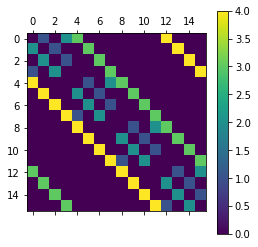

In [ ]:
Mn = M(N)
plt.matshow(Mn)
plt.colorbar()
plt.show()

Ahora si remplazamos las partes que componen las matrices de giros m en la matriz M

In [ ]:
Mng = M_giro(Mn,N)

Visualicemos la matriz obtenida. Observemos que es una matriz compleja

<Figure size 432x288 with 0 Axes>

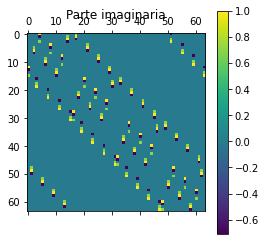

<Figure size 432x288 with 0 Axes>

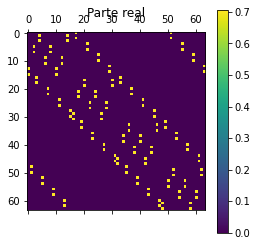

In [ ]:
plt.figure(1)
plt.matshow(np.imag(Mng))
plt.title("Parte imaginaria")
plt.colorbar()
plt.show()
plt.figure(2)
plt.matshow(np.real(Mng))
plt.title("Parte real")
plt.colorbar()
plt.show()

Los valores propios $λ_{α}$ para el sistema de NxN son:

In [ ]:
Valores_propios_n = propios(Mng)
print("-------------------------------------------------------------")
print("         Valores propios        ,       Multiplicidad        ")
print("-------------------------------------------------------------")
for i in range(len(Valores_propios_n[0])):
  print("|",Valores_propios_n[0][i] ,"|","\t",Valores_propios_n[1][i],"|")
print("-------------------------------------------------------------")

Diagonalizando matriz ...
Matriz M diagonalizada
-------------------------------------------------------------
         Valores propios        ,       Multiplicidad        
-------------------------------------------------------------
| 1.61803398874989 - 0.618033988749895*I | 	 4 |
| 1.41421356237309 - 1.0*I | 	 1 |
| 1.4142135623731 - 1.0*I | 	 5 |
| 1.61803398874989 + 0.618033988749895*I | 	 4 |
| 1.4142135623731 + 1.0*I | 	 5 |
| 1.41421356237309 + 1.0*I | 	 1 |
| 0.618033988749895 - 1.61803398874989*I | 	 4 |
| -3.53525079574969e-17 - 1.73205080756888*I | 	 2 |
| -3.53525079574969e-17 - 1.73205080756888*I | 	 2 |
| -0.618033988749895 - 1.61803398874989*I | 	 4 |
| -1.4142135623731 - 1.0*I | 	 5 |
| -1.41421356237309 - 1.0*I | 	 1 |
| -1.61803398874989 - 0.618033988749895*I | 	 4 |
| 0.618033988749895 + 1.61803398874989*I | 	 4 |
| 3.53525079574969e-17 + 1.73205080756888*I | 	 2 |
| 3.53525079574969e-17 + 1.73205080756888*I | 	 2 |
| -0.618033988749895 + 1.61803398874989*I | 	 4 |


Finalmente, calculamos la funcion partición 

In [ ]:
k = np.linspace(0,1,100)

In [ ]:
F = Z(k,NpN,N,Valores_propios_n)

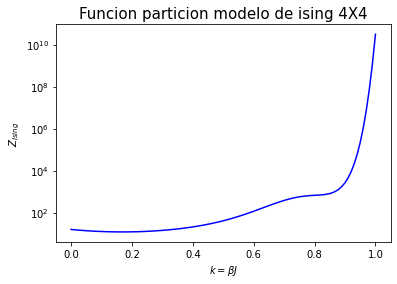

In [ ]:
#plt.plot(k,np.imag(F),color="red")
#plt.plot(k,np.real(F),color="black")
plt.plot(k,np.abs(F),color="blue")
plt.title(r"Funcion particion modelo de ising "+str(N)+"X"+str(N),fontname='Franklin Gothic Medium', fontsize=15)
plt.xlabel(r"$k=\beta J$")
plt.ylabel(r"$Z_{Ising}}$")
plt.yscale("log")

In [ ]:
F = Particion(k,NpN,N,Valores_propios_n)

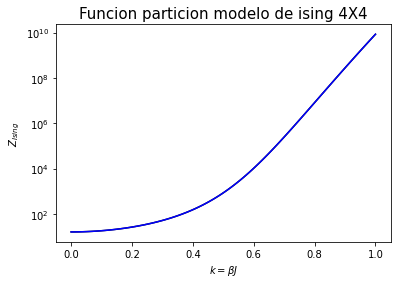

In [ ]:
#plt.plot(k,np.imag(F),color="red")
plt.plot(k,np.real(F),color="black")
plt.plot(k,np.abs(F),color="blue")
plt.title(r"Funcion particion modelo de ising "+str(N)+"X"+str(N),fontname='Franklin Gothic Medium', fontsize=15)
plt.xlabel(r"$k=\beta J$")
plt.ylabel(r"$Z_{Ising}}$")
plt.yscale("log")